In [1]:
import matplotlib.pyplot as plt
import h5py
import numpy as np

In [4]:
plt.rcParams['figure.figsize']

[6.0, 4.0]

In [5]:
print(plt.rcParamsDefault['figure.figsize'])

plt.rcParams = plt.rcParamsDefault

[8.0, 6.0]


In [13]:
#matplotlib.pyplot.rcParams

RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.avconv_args': [],
          'animation.avconv_path': 'avconv',
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': [],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.html_args': [],
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'black',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-5, 6],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.f

[]

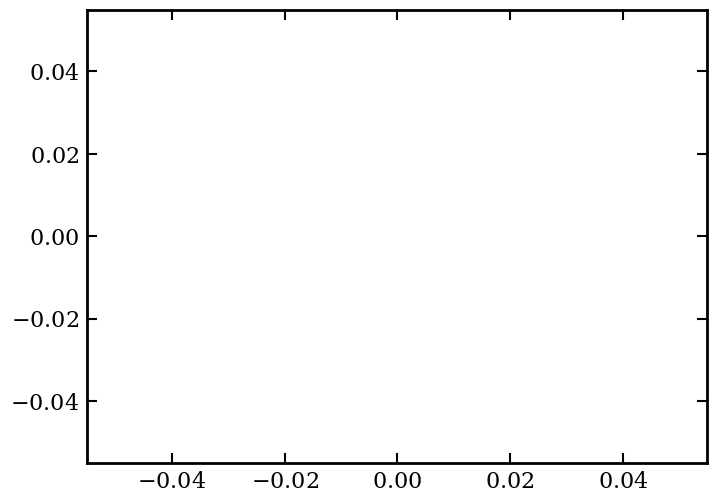

In [4]:
plt.plot()

In [8]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.ensemble import BaggingClassifier

In [4]:
#Here I want to test some regressors

import numpy as np
import h5py
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

from sklearn.model_selection import train_test_split

In [12]:
#alright now I'm going to try to apply to data

f = h5py.File('../halo_1107_Z13/halo_1107_Z13_particles.hdf5')

print(f.keys())

h = 0.675

parts = f['PartType1']
print(parts.keys())

<KeysViewHDF5 ['PartType1']>
<KeysViewHDF5 ['Coordinates', 'Masses', 'ParticleIDs', 'Stellar_Masses', 'Velocities']>


<ipython-input-12-d23705daaa72>:3: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  f = h5py.File('../halo_1107_Z13/halo_1107_Z13_particles.hdf5')


In [17]:
coords = parts['Coordinates'][:]/h
vel = parts['Velocities'][:]
mass= parts['Masses'][:]*1.0e10/h
stellar_mass = mass[0]*0.17
ids = parts['ParticleIDs'][:]
star_mass = parts['Stellar_Masses'][:]
dist = np.linalg.norm(coord_diff,axis=1)
dist_gal = dist[(dist<300.0)]
star_gal = np.ndarray.flatten(star_mass)[dist<300.0]

stellar_mass

4959.9004101562505

In [8]:
np.min(star_mass[star_mass!=0.0])

2.9802322e-08

In [14]:
host_cen = np.array([37.53820323, 34.52403051, 37.02327211])*1000.0/h
host_vel = np.array([ 57.161152, -83.112122, -17.277088])

coord_diff = np.subtract(coords,host_cen)
vel_diff = np.subtract(vel,host_vel)

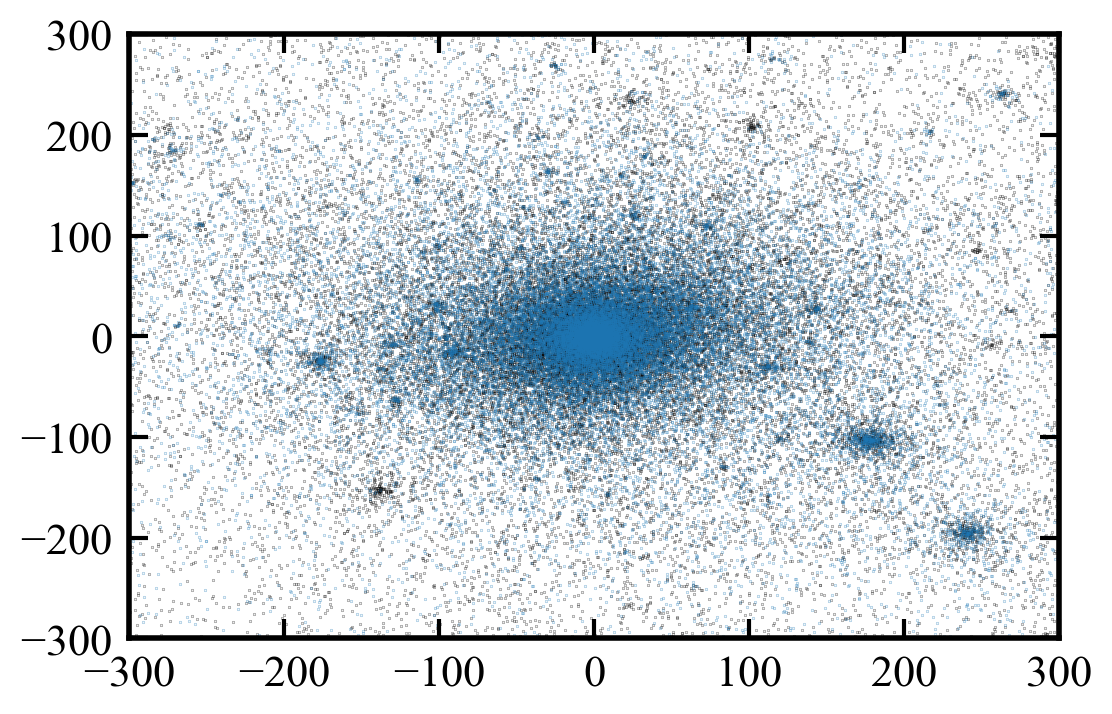

In [80]:
star_mask = (np.ndarray.flatten(star_mass)>0.0)

plt.scatter(coord_diff[:,0][::1000],coord_diff[:,1][::1000],s=0.01,color='k')
plt.scatter(coord_diff[:,0][star_mask][::1000],coord_diff[:,1][star_mask][::1000],s=0.01)
plt.xlim([-300.0,300.0])
plt.ylim([-300.0,300.0])
plt.savefig('./fig_1.png',bbox_inches='tight')
plt.show()

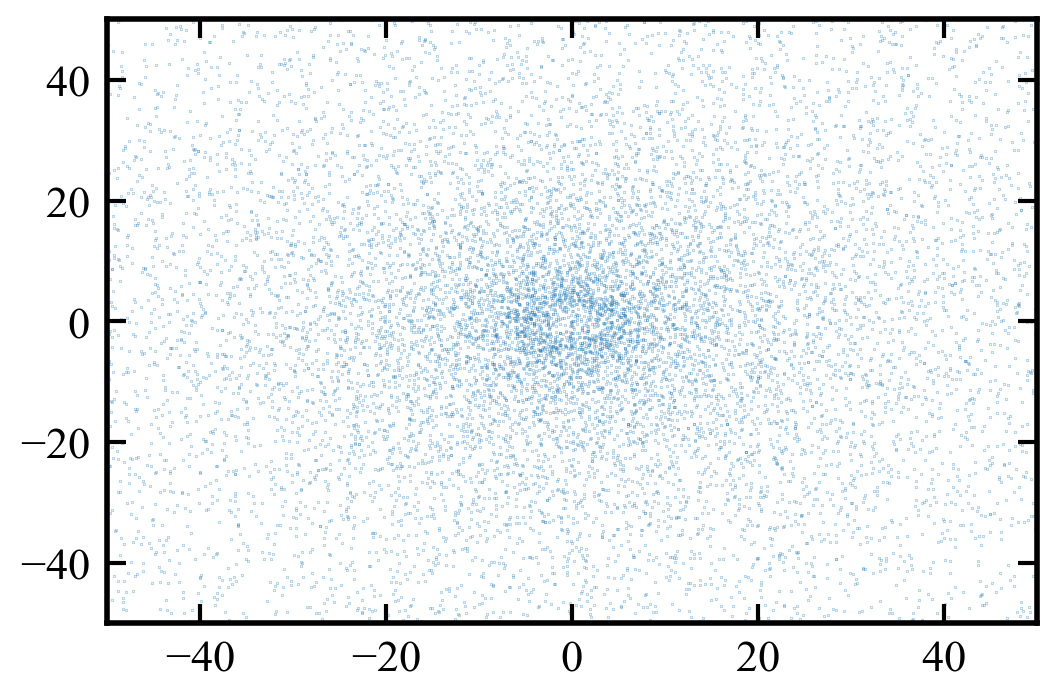

In [9]:
plt.scatter(coord_diff[:,0][star_mask][::1000],coord_diff[:,1][star_mask][::1000],s=0.01)
plt.xlim([-50.0,50.0])
plt.ylim([-50.0,50.0])
plt.show()

In [49]:
np.min(star_gal[star_gal!=0.0])

2.9802322e-08

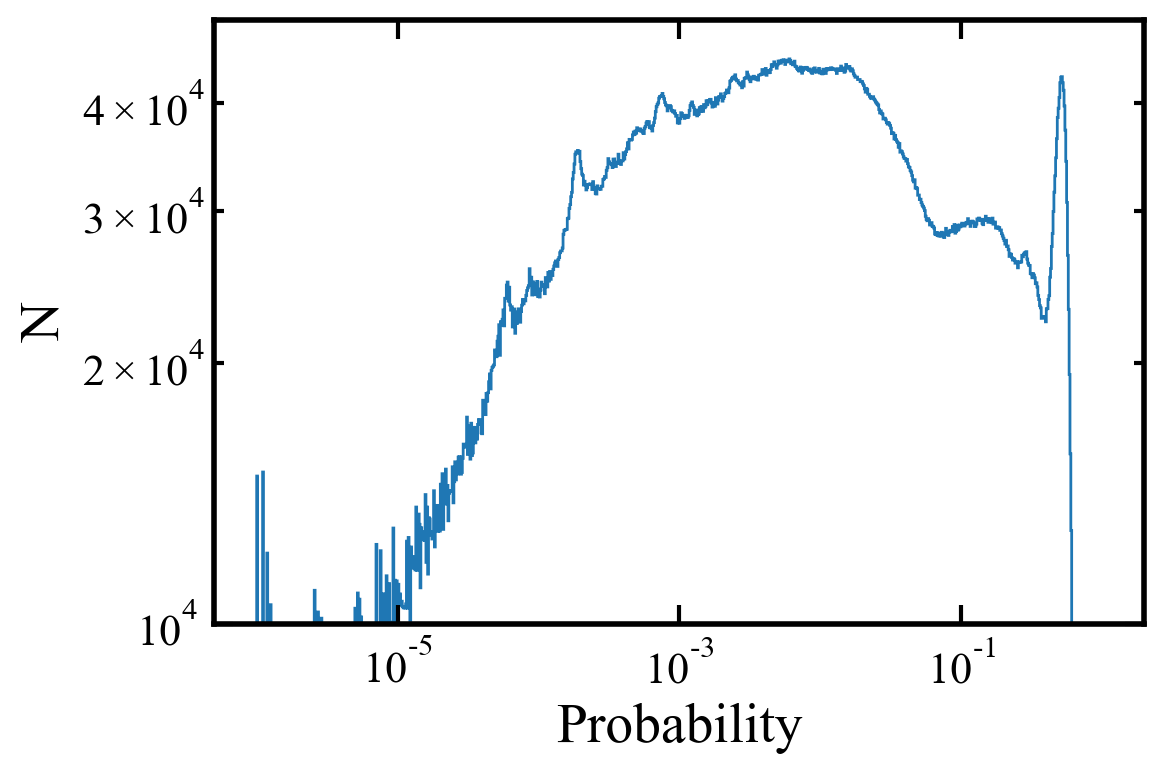

In [72]:
plt.hist(star_gal,bins=np.logspace(-6.0,0.0,1000),histtype='step')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Probability',fontsize=20)
plt.ylabel('N',fontsize=20)
plt.ylim([1.0e4,5.0e4])
plt.savefig('./fig_2.png',bbox_inches='tight')
plt.show()

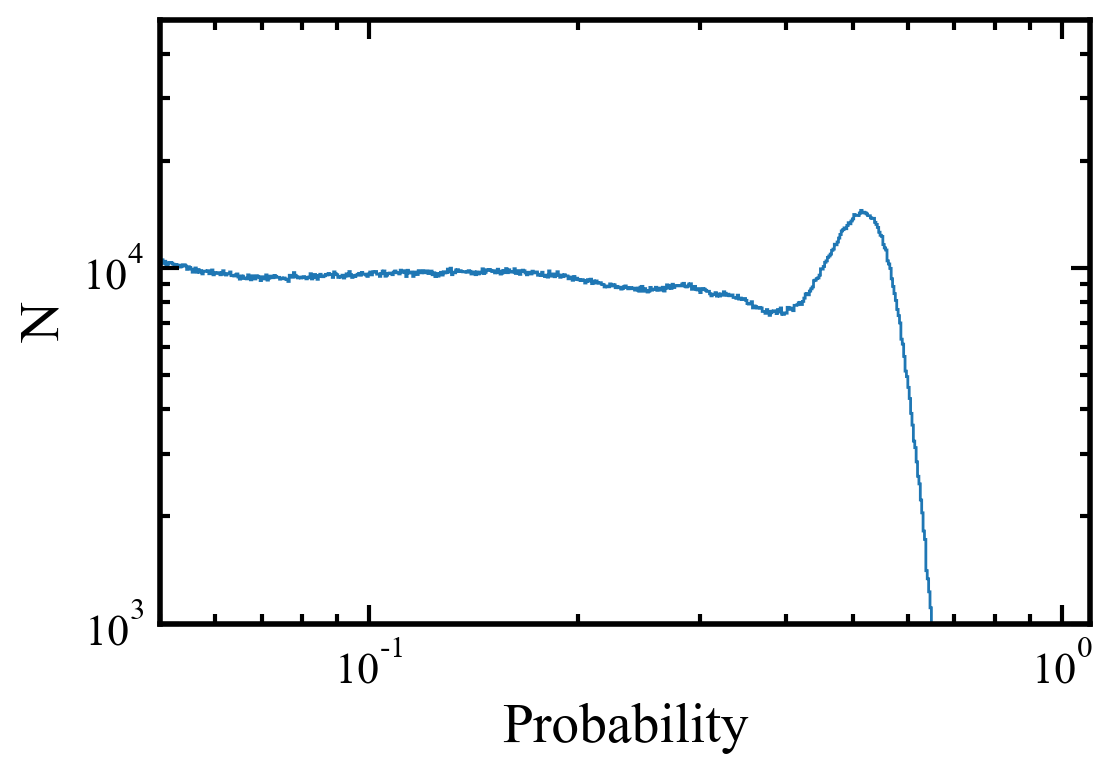

In [74]:
plt.hist(star_gal,bins=np.logspace(-2.0,0.0,1000),normed=False,histtype='step')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Probability',fontsize=20)
plt.ylabel('N',fontsize=20)
plt.ylim([1.0e3,5.0e4])
plt.xlim([5.0e-2,1.1])
plt.savefig('./fig_3.png',bbox_inches='tight')
plt.show()

In [11]:
dist = np.linalg.norm(coord_diff,axis=1)
dist_gal = dist[(dist<300.0)]
star_gal = np.ndarray.flatten(star_mass)[dist<300.0]

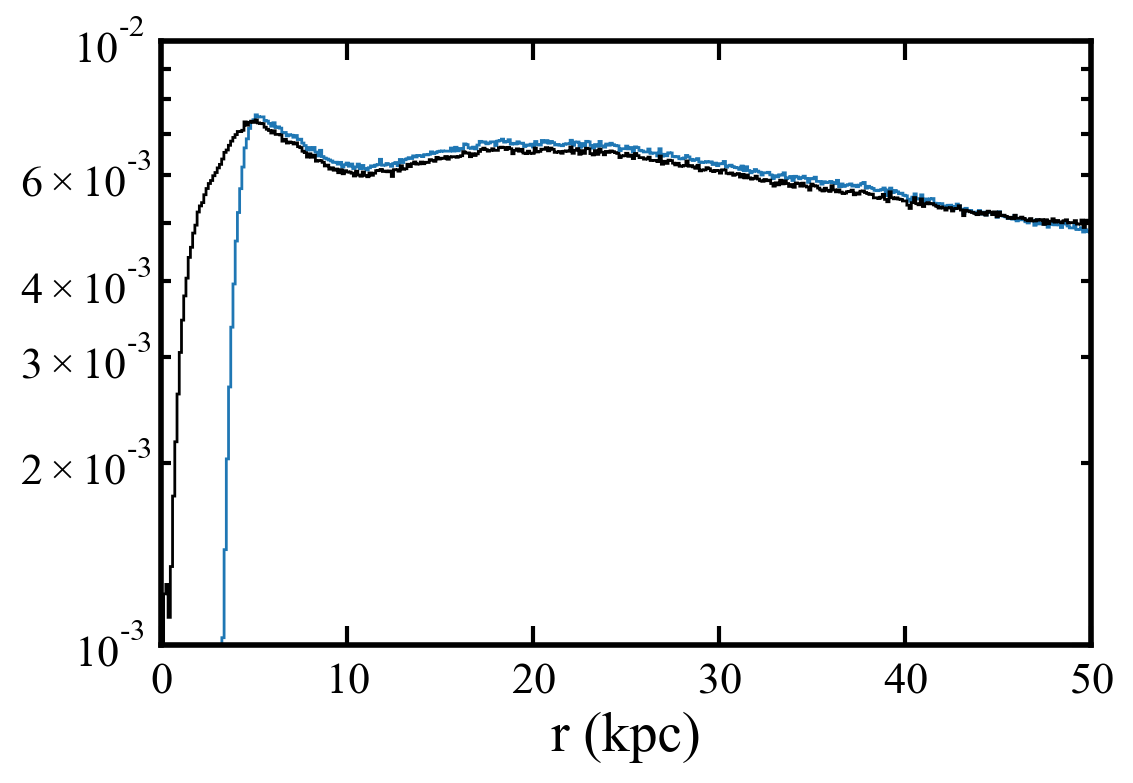

In [75]:
plt.hist(dist_gal[(star_gal>0.0)],bins=2500,normed=True,histtype='step')
plt.hist(dist_gal,bins=2500,normed=True,histtype='step',color='k')
plt.yscale('log')
plt.xlim([0.0,50.0])
plt.ylim([1.0e-3,1.0e-2])
plt.xlabel('r (kpc)',fontsize=20)
plt.savefig('./fig_4.png',bbox_inches='tight')
plt.show()

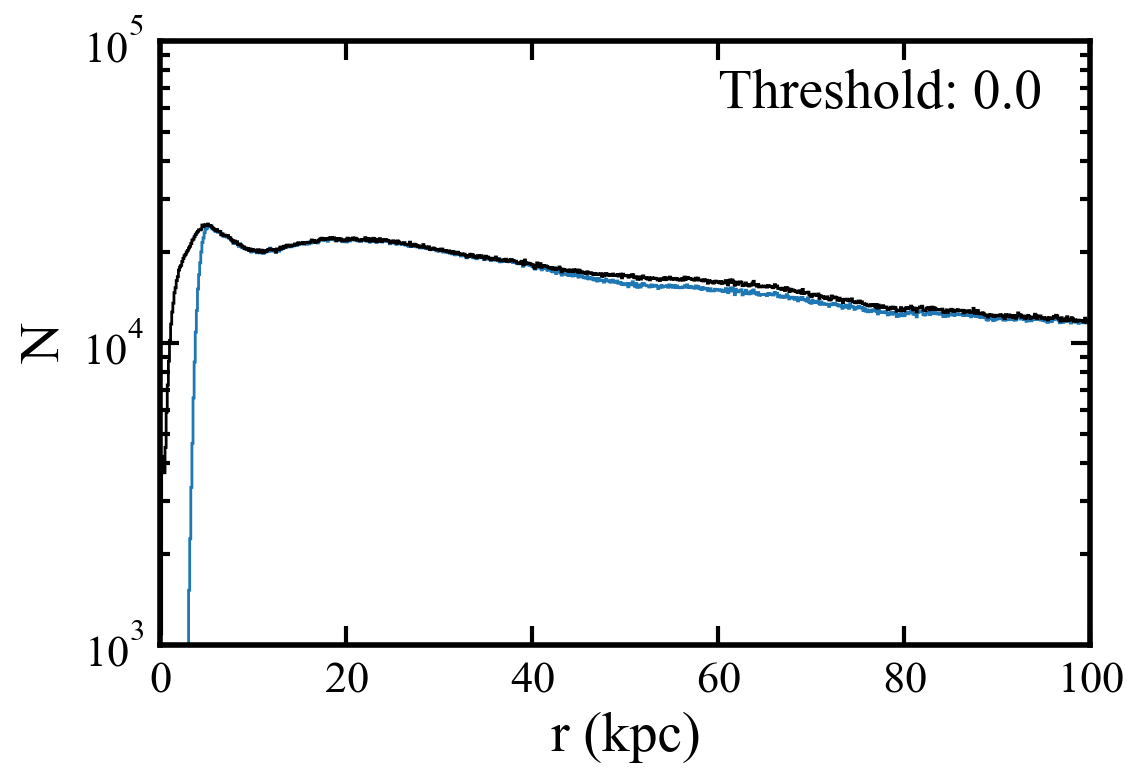

In [76]:
threshold = 0.0
plt.hist(dist_gal[(star_gal>threshold)],bins=2500,normed=False,histtype='step')
plt.hist(dist_gal,bins=2500,normed=False,histtype='step',color='k')
plt.yscale('log')
plt.xlim([0.0,100.0])
plt.ylim([1.0e3,1.0e5])
plt.xlabel('r (kpc)',fontsize=20)
plt.ylabel('N',fontsize=20)
plt.text(60.0,6.0e4,'Threshold: {}'.format(threshold),fontsize=20)
plt.savefig('./fig_5.png',bbox_inches='tight')
plt.show()

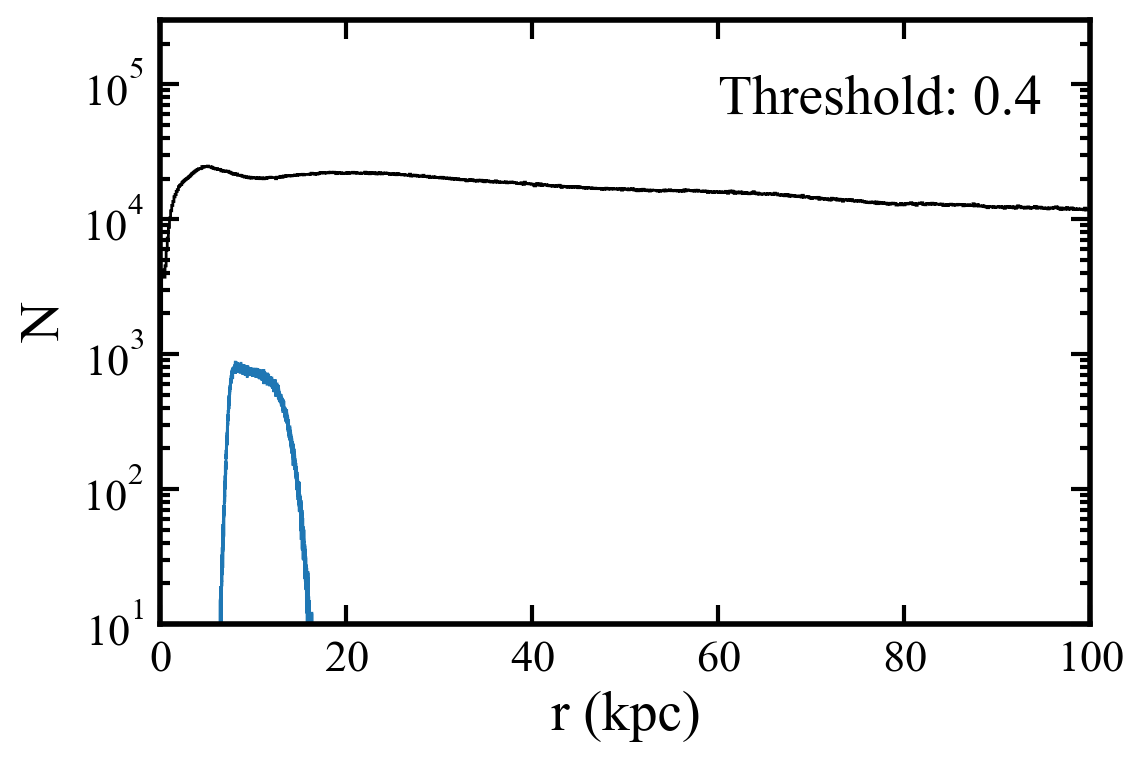

In [77]:
threshold = 0.4
plt.hist(dist_gal[(star_gal>threshold)],bins=2500,normed=False,histtype='step')
plt.hist(dist_gal,bins=2500,normed=False,histtype='step',color='k')
plt.yscale('log')
plt.xlim([0.0,100.0])
plt.ylim([1.0e1,3.0e5])
plt.xlabel('r (kpc)',fontsize=20)
plt.ylabel('N',fontsize=20)
plt.text(60.0,6.0e4,'Threshold: {}'.format(threshold),fontsize=20)
plt.savefig('./fig_6.png',bbox_inches='tight')
plt.show()

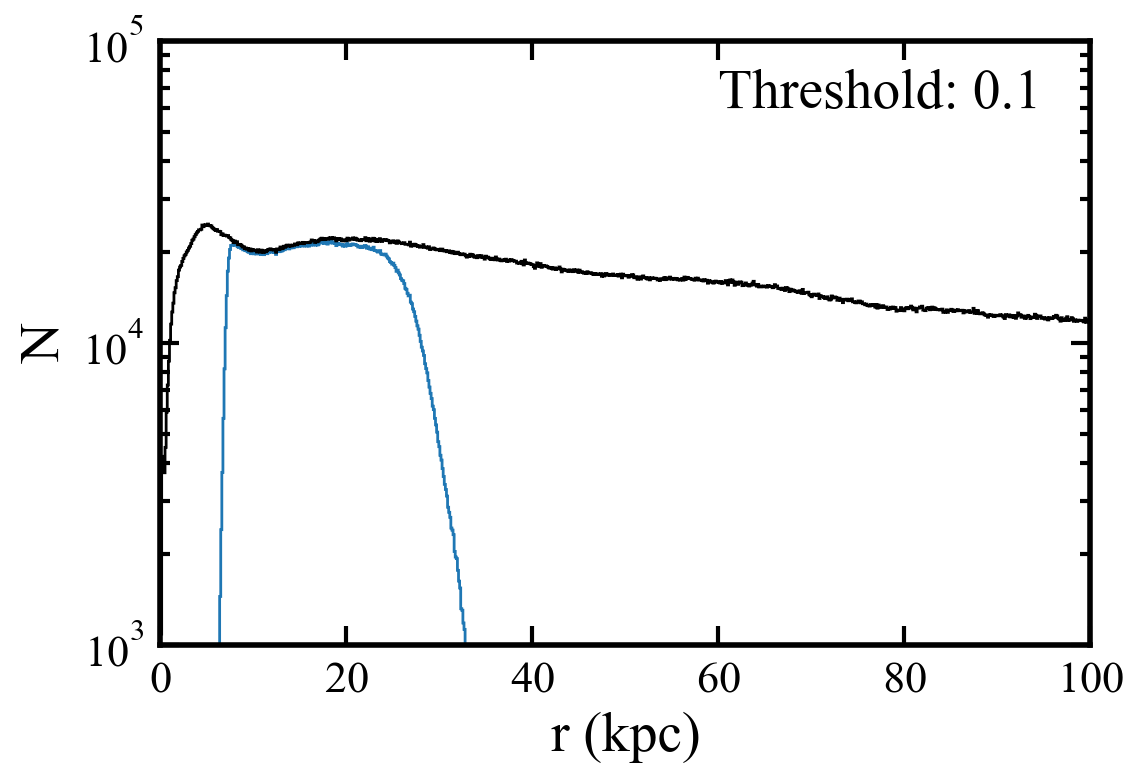

In [78]:
threshold = 0.1
plt.hist(dist_gal[(star_gal>threshold)],bins=2500,normed=False,histtype='step')
plt.hist(dist_gal,bins=2500,normed=False,histtype='step',color='k')
plt.yscale('log')
plt.xlim([0.0,100.0])
plt.ylim([1.0e3,1.0e5])
plt.xlabel('r (kpc)',fontsize=20)
plt.ylabel('N',fontsize=20)
plt.text(60.0,6.0e4,'Threshold: {}'.format(threshold),fontsize=20)
plt.savefig('./fig_7.png',bbox_inches='tight')
plt.show()

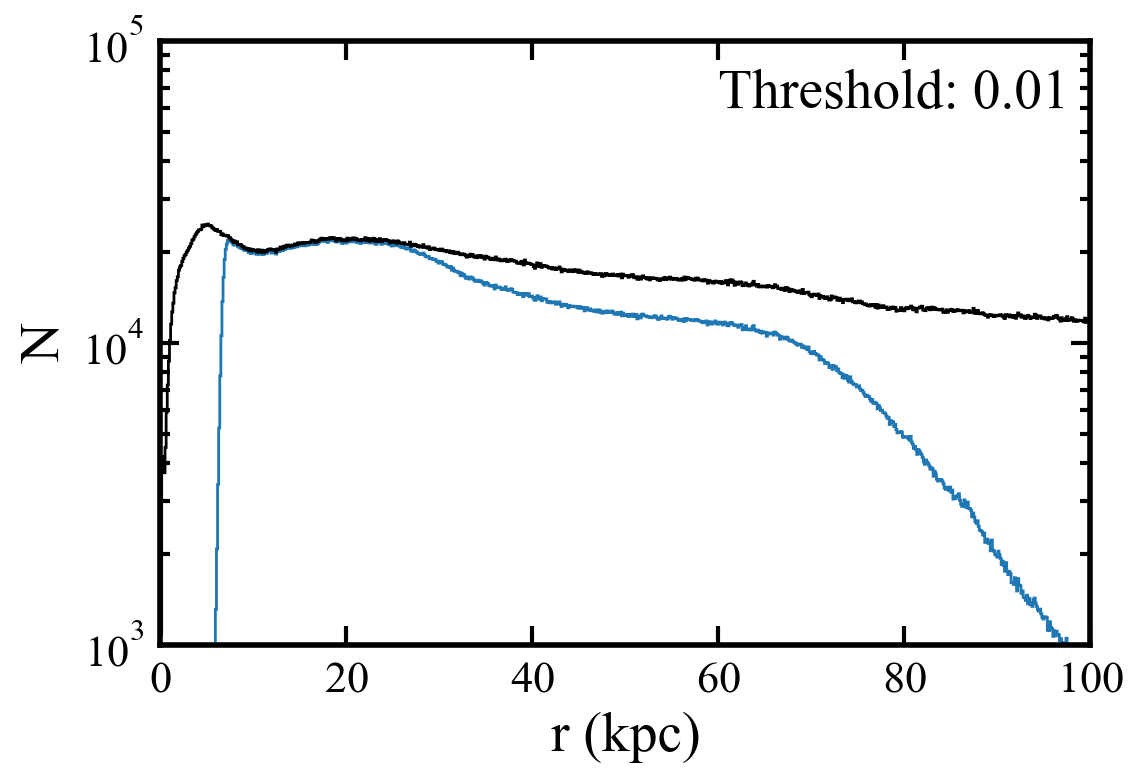

In [79]:
threshold = 1.0e-2
plt.hist(dist_gal[(star_gal>threshold)],bins=2500,normed=False,histtype='step')
plt.hist(dist_gal,bins=2500,normed=False,histtype='step',color='k')
plt.yscale('log')
plt.xlim([0.0,100.0])
plt.ylim([1.0e3,1.0e5])
plt.xlabel('r (kpc)',fontsize=20)
plt.ylabel('N',fontsize=20)
plt.text(60.0,6.0e4,'Threshold: {}'.format(threshold),fontsize=20)
plt.savefig('./fig_8.png',bbox_inches='tight')
plt.show()

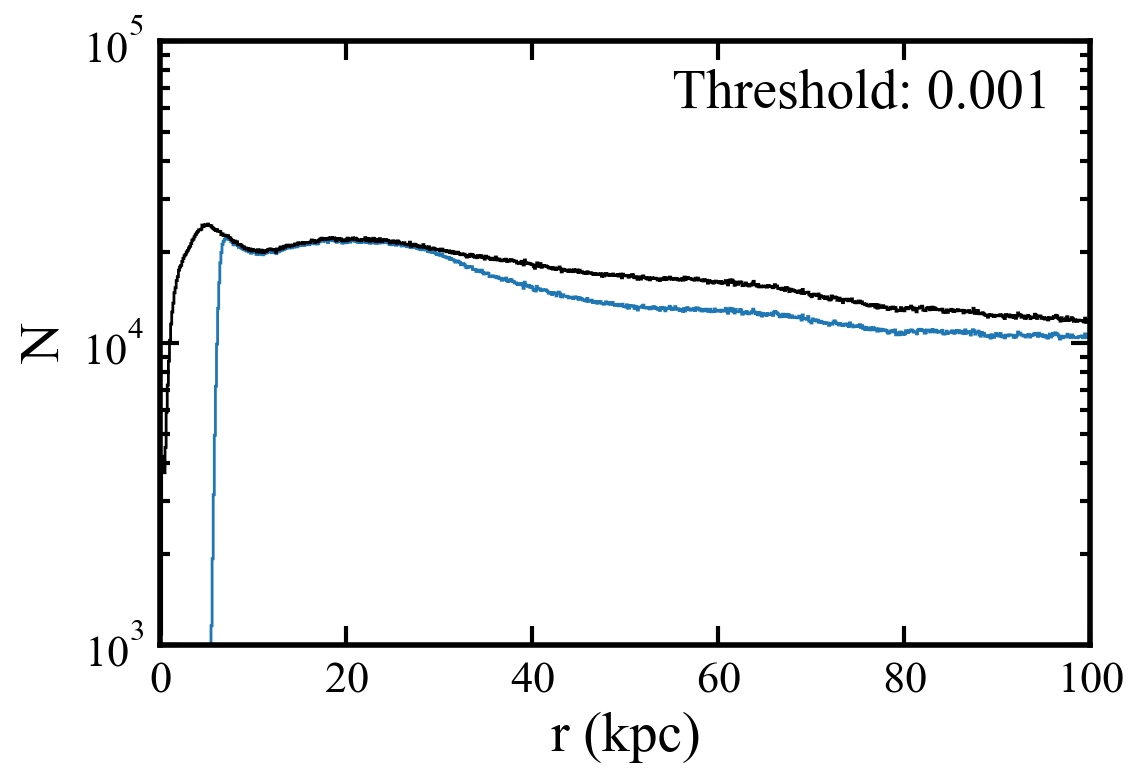

In [39]:
threshold = 1.0e-3
plt.hist(dist_gal[(star_gal>threshold)],bins=2500,normed=False,histtype='step')
plt.hist(dist_gal,bins=2500,normed=False,histtype='step',color='k')
plt.yscale('log')
plt.xlim([0.0,100.0])
plt.ylim([1.0e3,1.0e5])
plt.xlabel('r (kpc)',fontsize=20)
plt.ylabel('N',fontsize=20)
plt.text(55.0,6.0e4,'Threshold: {}'.format(threshold),fontsize=20)
plt.show()

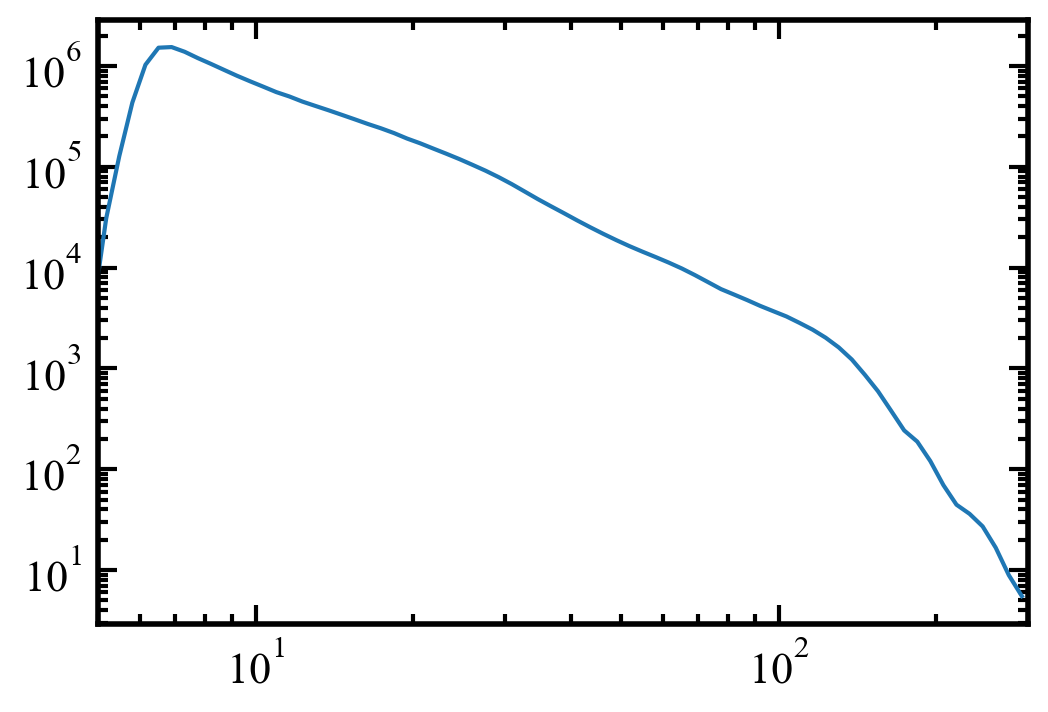

In [18]:
bins = np.logspace(1.0e-3,np.log10(300.0),100)
threshold = 1.0e-3

dist_halo = dist_gal[star_gal>threshold] 

density_profile = []

for kk in range(len(bins)-1):
    particle_mask = (dist_halo>bins[kk])&(dist_halo<bins[kk+1])
    mass_bin = np.sum(particle_mask)*stellar_mass
    bin_size = 4.0/3.0*np.pi*(bins[kk+1]**3.0-bins[kk]**3.0)
    density_profile.append(mass_bin/bin_size)

    
bins_plot = np.array([(bins[xx]+bins[xx+1])/2.0 for xx in range(len(bins)-1)])

plt.plot(bins_plot,density_profile)
plt.xscale('log')
plt.yscale('log')
plt.xlim([5.0,300.0])
plt.show()

0.001
[-1.90866491e+01 -2.29667615e+10]


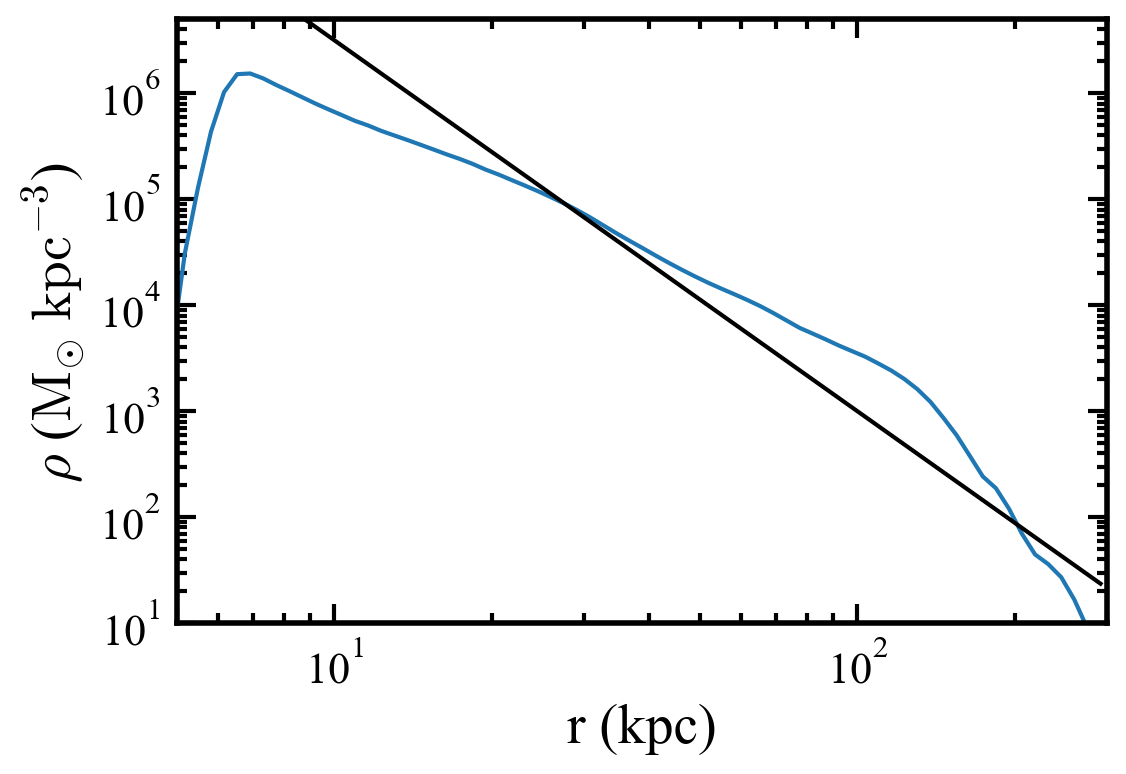

0.01
[-7.20922729e-01  2.16892830e+06]


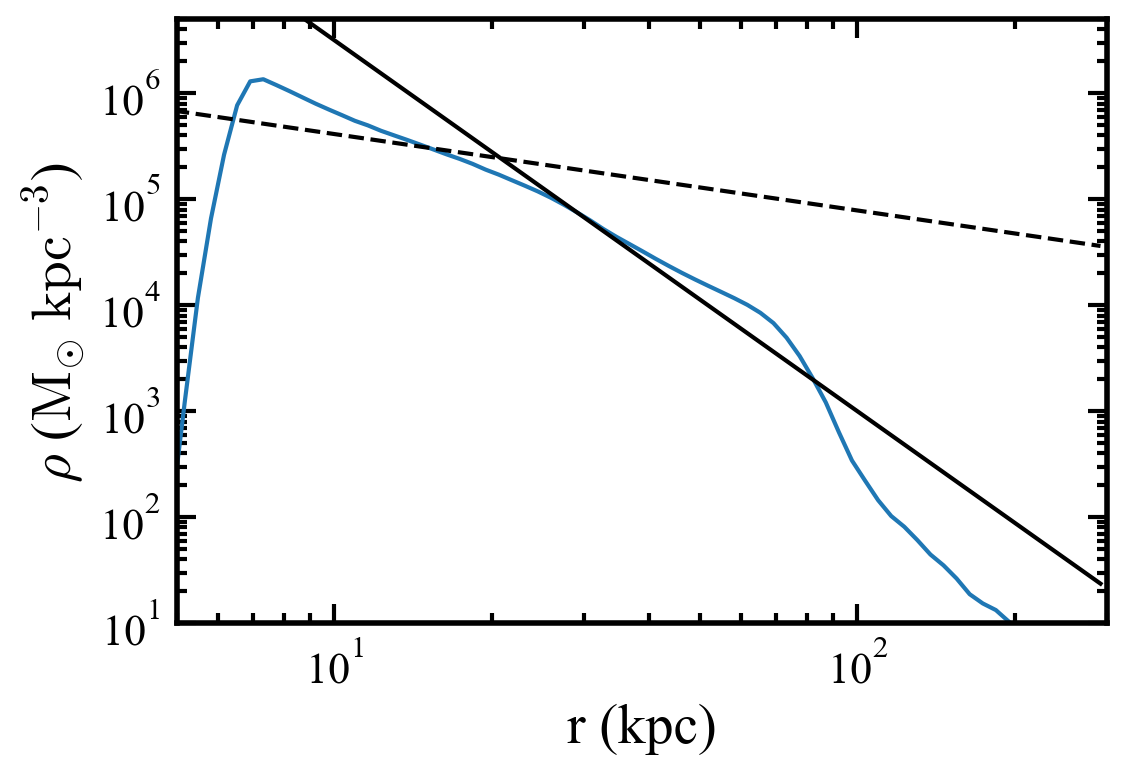

0.1
[-6.64256405e-01  1.93622030e+06]


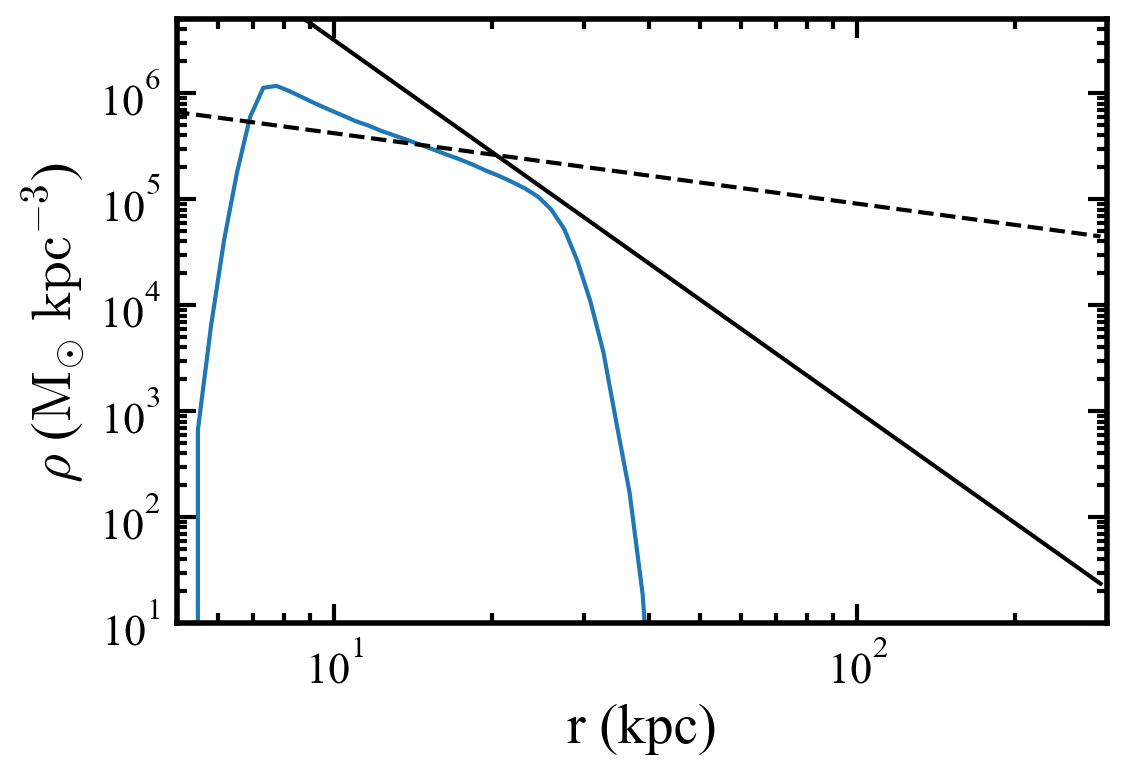

0.4
[-3.57222849e-01  8.78566725e+05]


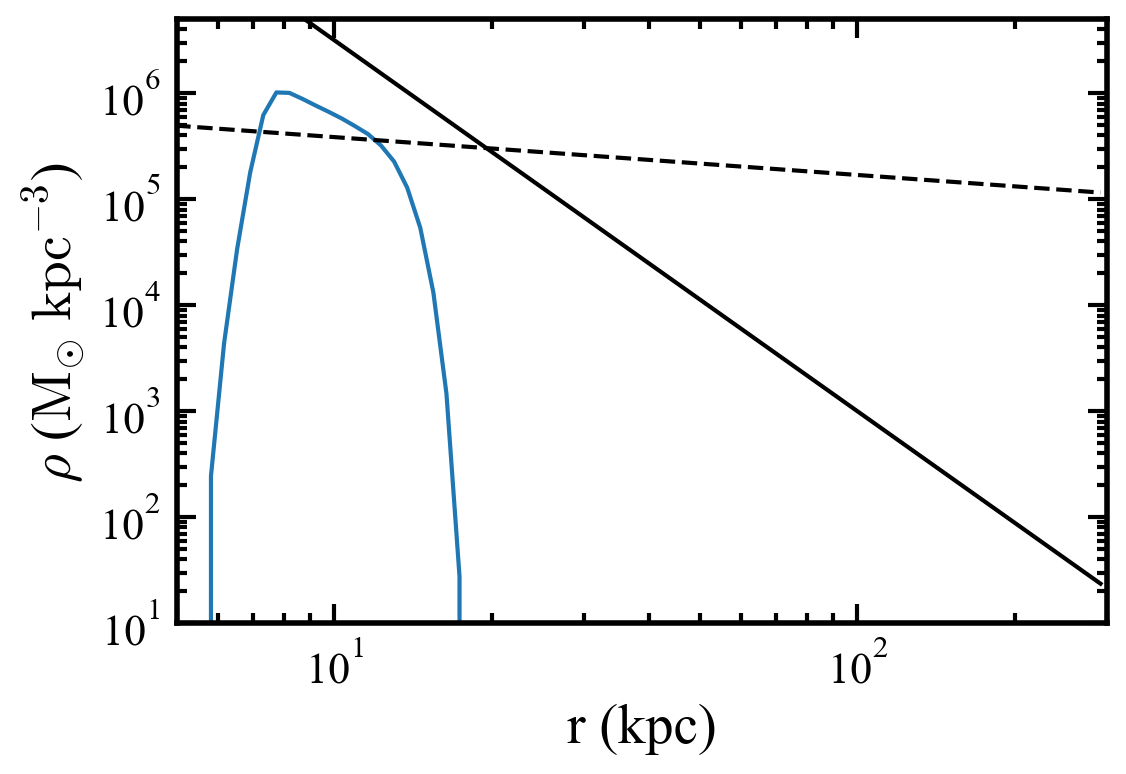

In [38]:
from scipy.optimize import curve_fit

def power_law(r,alpha,A):
    import numpy as np
    return A*np.power(r,alpha)

threshold_list = [1.0e-3,1.0e-2,0.1,0.4]
for threshold in threshold_list:
    print threshold
    bins = np.logspace(1.0e-3,np.log10(300.0),100)
    dist_halo = dist_gal[star_gal>threshold] 

    density_profile = []

    for kk in range(len(bins)-1):
        particle_mask = (dist_halo>bins[kk])&(dist_halo<bins[kk+1])
        mass_bin = np.sum(particle_mask)*stellar_mass
        bin_size = 4.0/3.0*np.pi*(bins[kk+1]**3.0-bins[kk]**3.0)
        density_profile.append(mass_bin/bin_size)

    bins_plot = np.array([(bins[xx]+bins[xx+1])/2.0 for xx in range(len(bins)-1)])
    density_profile = np.array(density_profile)
    
    density_mask = (density_profile>1.0e2)
    popt, pcov = curve_fit(power_law,bins_plot[density_mask],density_profile[density_mask],p0=[-3.6,1.0e10])
    print popt
    
    fit_plot = power_law(bins_plot,*popt)
    fit_test = power_law(bins_plot,-3.5,1.0e10)
    
    plt.plot(bins_plot,density_profile,color='C0')
    plt.plot(bins_plot,fit_plot,color='k',linestyle='--')
    plt.plot(bins_plot,fit_test,color='k',linestyle='-')
    plt.xscale('log')
    plt.yscale('log')
    plt.xlim([5.0,300.0])
    plt.ylim([10.0,5.0e6])
    plt.xlabel('r (kpc)',fontsize=20)
    plt.ylabel(r'$\rm \rho$ ($\rm M_{\odot}$ $\rm kpc^{-3}$)',fontsize=20)
    plt.show()

0.001
0.0012835688421125163
0.0016475489724420657
0.0021147425268811283
0.002714417616594907
0.0034841418771425405
0.00447213595499958
0.005740294369528563
0.0073680629972807735
0.00945741609003176
0.012139244620058345
0.015581556161088883
0.020000000000000004
0.025671376842250328
0.03295097944884132
0.04229485053762257
0.05428835233189814
0.06968283754285082
0.0894427190999916
0.11480588739057127
0.1473612599456155
0.1891483218006352
0.24278489240116696
0.3116311232217777
0.4


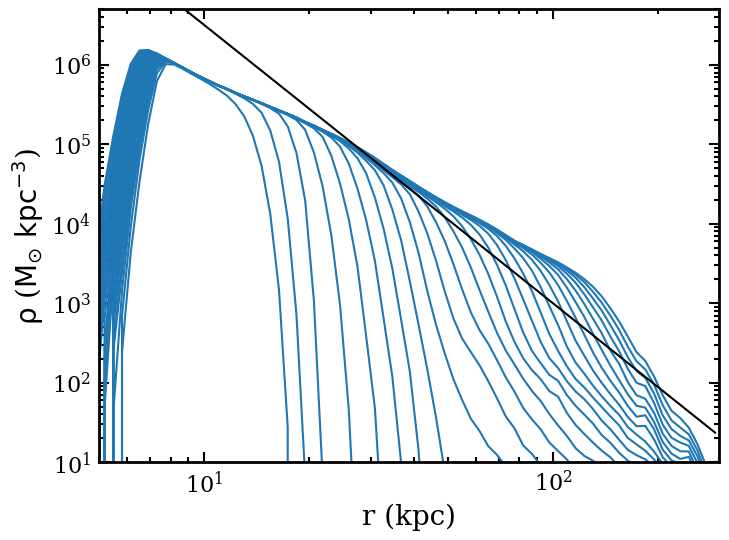

In [19]:
from scipy.optimize import curve_fit

def power_law(r,alpha,A):
    import numpy as np
    return A*np.power(r,alpha)

threshold_list = np.logspace(-3.0,np.log10(0.4),25)
for threshold in threshold_list:
    print(threshold)
    bins = np.logspace(1.0e-3,np.log10(300.0),100)
    dist_halo = dist_gal[star_gal>threshold] 

    density_profile = []

    for kk in range(len(bins)-1):
        particle_mask = (dist_halo>bins[kk])&(dist_halo<bins[kk+1])
        mass_bin = np.sum(particle_mask)*stellar_mass
        bin_size = 4.0/3.0*np.pi*(bins[kk+1]**3.0-bins[kk]**3.0)
        density_profile.append(mass_bin/bin_size)

    bins_plot = np.array([(bins[xx]+bins[xx+1])/2.0 for xx in range(len(bins)-1)])
    density_profile = np.array(density_profile)
    plt.plot(bins_plot,density_profile,color='C0')

    #fit_plot = power_law(bins_plot,*popt)
fit_test = power_law(bins_plot,-3.5,1.0e10)    
plt.plot(bins_plot,fit_test,color='k',linestyle='-')
plt.xscale('log')
plt.yscale('log')
plt.xlim([5.0,300.0])
plt.ylim([10.0,5.0e6])
plt.xlabel('r (kpc)',fontsize=20)
plt.ylabel(r'$\rm \rho$ ($\rm M_{\odot}$ $\rm kpc^{-3}$)',fontsize=20)
plt.show()

<ipython-input-20-7acfef456fd4>:5: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  f_fire = h5py.File('../m12i_res_7100_cdm/output/snapshot_600.stars.hdf5')
<ipython-input-20-7acfef456fd4>:10: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  f_halo = h5py.File('../m12i_res_7100_cdm/halo_600.hdf5')


1018532800000.0


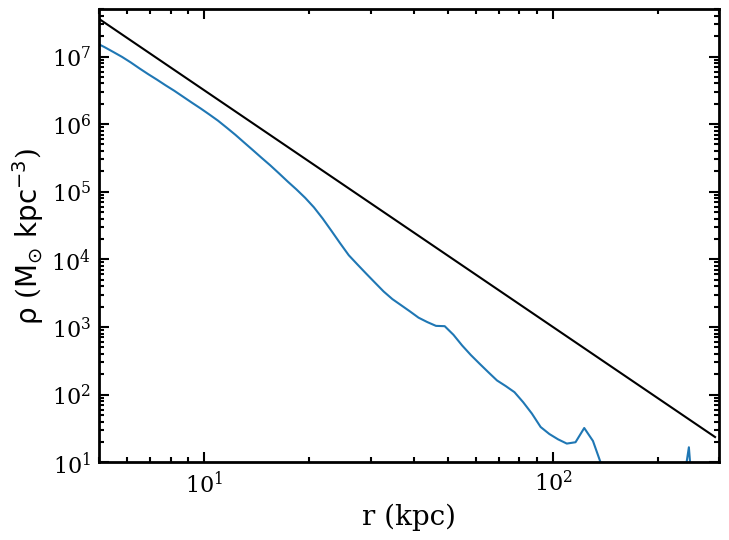

In [20]:
def power_law(r,alpha,A):
    import numpy as np
    return A*np.power(r,alpha)

f_fire = h5py.File('../m12i_res_7100_cdm/output/snapshot_600.stars.hdf5')
h = 0.702
coords_fire = f_fire['PartType4']['Coordinates'][:]/h
mass_fire = f_fire['PartType4']['Masses'][:]*1.0e10/h

f_halo = h5py.File('../m12i_res_7100_cdm/halo_600.hdf5')
mass_halo = f_halo['mass'][:]
pos_halo = f_halo['position'][:]

halo_id = np.argmax(mass_halo)
print(mass_halo[halo_id])
halo_cen = pos_halo[halo_id]
coord_diff = coords_fire-halo_cen
coord_dist = np.linalg.norm(coord_diff,axis=1)

bins = np.logspace(1.0e-3,np.log10(300.0),100)
bins_plot = np.array([(bins[xx]+bins[xx+1])/2.0 for xx in range(len(bins)-1)])
density_profile = []

for kk in range(len(bins)-1):
    particle_mask = (coord_dist>bins[kk])&(coord_dist<bins[kk+1])
    mass_bin = np.sum(mass_fire[particle_mask])
    bin_size = 4.0/3.0*np.pi*(bins[kk+1]**3.0-bins[kk]**3.0)
    density_profile.append(mass_bin/bin_size)
    
density_profile_stars = density_profile
    
fit_test = power_law(bins_plot,-3.5,1.0e10)  
plt.plot(bins_plot,density_profile,color='C0')
plt.plot(bins_plot,fit_test,color='k',linestyle='-')
plt.xscale('log')
plt.yscale('log')
plt.xlim([5.0,300.0])
plt.ylim([10.0,5.0e7])
plt.xlabel('r (kpc)',fontsize=20)
plt.ylabel(r'$\rm \rho$ ($\rm M_{\odot}$ $\rm kpc^{-3}$)',fontsize=20)
plt.show()

In [21]:
f = h5py.File('../m12i_res_7100_cdm/DM_data_w_stars_training.hdf5')
print(f.keys())

h = 0.702

parts = f['PartType1']
coords = parts['Coordinates'][:]/h
vel = parts['Velocities'][:]
mass= parts['Masses'][:]*1.0e10/h
ids = parts['ParticleIDs'][:]
star_mass = parts['Stellar_Masses'][:]

f_halo = h5py.File('../m12i_res_7100_cdm/halo/halo_600.hdf5')
pos_halo = f_halo['position'][:]/h
mass_halo = f_halo['mass'][:]
radius_halo = f_halo['radius'][:]
vel_halo = f_halo['velocity'][:]

#identify the host                                                                                                    
host_id = np.argmax(mass_halo)
host_mass = mass_halo[host_id]
host_pos = pos_halo[host_id]
host_vel = vel_halo[host_id]

dist = np.linalg.norm(coords-host_pos,axis=1) #distance of all the stars from the host center                       
dist_halo = np.linalg.norm(pos_halo-host_pos,axis=1) #distance of all halos from the host center 


<ipython-input-21-cc54788725c3>:1: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  f = h5py.File('../m12i_res_7100_cdm/DM_data_w_stars_training.hdf5')


<KeysViewHDF5 ['PartType1']>


<ipython-input-21-cc54788725c3>:13: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  f_halo = h5py.File('../m12i_res_7100_cdm/halo/halo_600.hdf5')


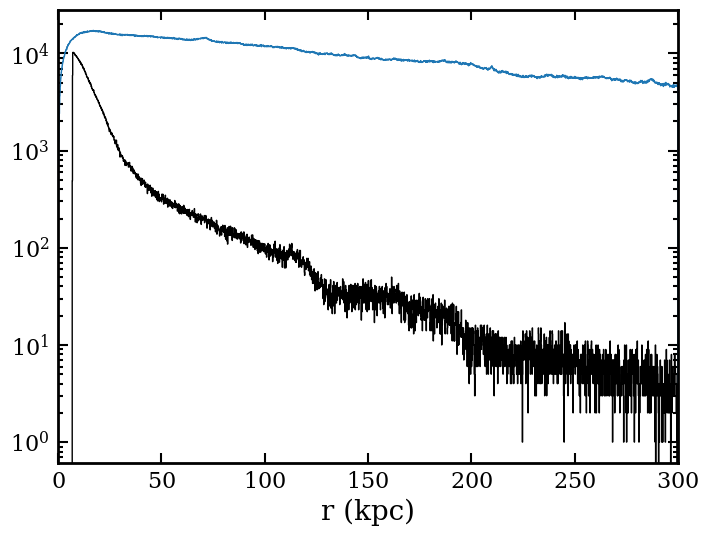

In [6]:
plt.hist(dist[(dist>0.0)&(dist<300.0)],bins=2500,density=False,histtype='step')
plt.hist(dist[(dist>0.0)&(dist<300.0)&(star_mass>0.0)],bins=2500,density=False,histtype='step',color='k')
plt.yscale('log')
plt.xlim([0.0,300.0])
#plt.ylim([1.0e-3,1.0e-2])
plt.xlabel('r (kpc)',fontsize=20)
#plt.savefig('./fig_4.png',bbox_inches='tight')
plt.show()


[]

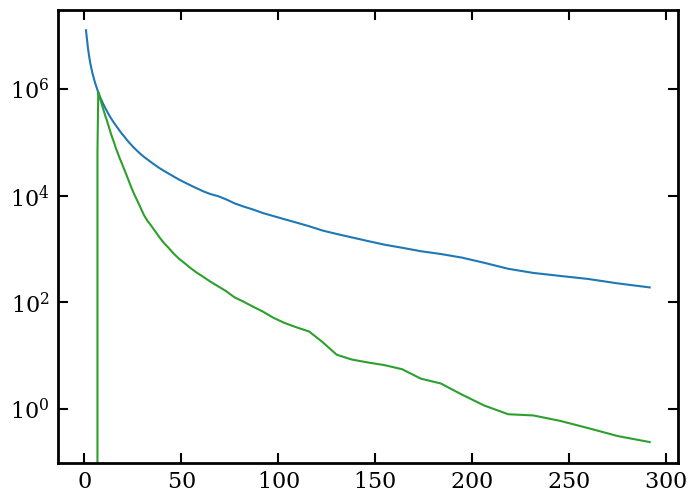

In [25]:
density_profile_from_dm = []
density_profile_real = []

for kk in range(len(bins)-1):
    particle_mask = (dist>bins[kk])&(dist<bins[kk+1])
    mass_bin_real = np.sum(star_mass[particle_mask])
    mass_bin = np.sum(particle_mask)*stellar_mass
    bin_size = 4.0/3.0*np.pi*(bins[kk+1]**3.0-bins[kk]**3.0)
    density_profile_from_dm.append(mass_bin/bin_size)
    density_profile_real.append(mass_bin_real/bin_size)
    
plt.plot(bins_plot,density_profile_from_dm,color='C0')
plt.plot(bins_plot,density_profile_real,color='C2')
plt.yscale('log')
plt.plot()

In [17]:
#alright now I'm going to try to apply to data

f = h5py.File('../halo_1107_Z13/halo_1107_Z13_particles.hdf5')

print(f.keys())

h = 0.675

parts = f['PartType1']
print(parts.keys())
      
coords = parts['Coordinates'][:]/h
vel = parts['Velocities'][:]
mass= parts['Masses'][:]*1.0e10/h
stellar_mass = mass[0]*0.17
ids = parts['ParticleIDs'][:]
star_mass = parts['Stellar_Masses'][:]

host_cen = np.array([37.53820323, 34.52403051, 37.02327211])*1000.0/h
host_vel = np.array([ 57.161152, -83.112122, -17.277088])

coord_diff = np.subtract(coords,host_cen)
vel_diff = np.subtract(vel,host_vel)

dist = np.linalg.norm(coord_diff,axis=1)
dist_gal = dist[(dist<300.0)]
star_gal = np.ndarray.flatten(star_mass)[dist<300.0]


<ipython-input-17-e4f60e36df31>:3: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  f = h5py.File('../halo_1107_Z13/halo_1107_Z13_particles.hdf5')


<KeysViewHDF5 ['PartType1']>
<KeysViewHDF5 ['Coordinates', 'Masses', 'ParticleIDs', 'Stellar_Masses', 'Velocities']>


0.001
0.0012835688421125163
0.0016475489724420657
0.0021147425268811283
0.002714417616594907
0.0034841418771425405
0.00447213595499958
0.005740294369528563
0.0073680629972807735
0.00945741609003176
0.012139244620058345
0.015581556161088883
0.020000000000000004
0.025671376842250328
0.03295097944884132
0.04229485053762257
0.05428835233189814
0.06968283754285082
0.0894427190999916
0.11480588739057127
0.1473612599456155
0.1891483218006352
0.24278489240116696
0.3116311232217777
0.4


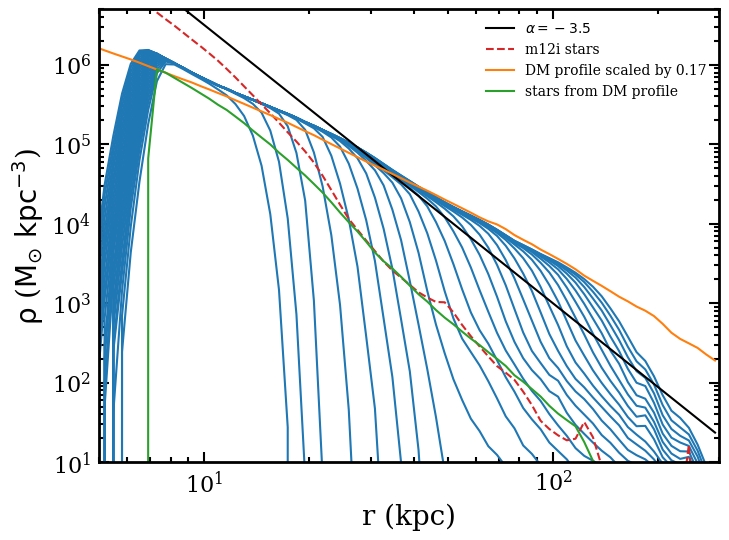

In [28]:
from scipy.optimize import curve_fit

def power_law(r,alpha,A):
    import numpy as np
    return A*np.power(r,alpha)

threshold_list = np.logspace(-3.0,np.log10(0.4),25)
for threshold in threshold_list:
    print(threshold)
    bins = np.logspace(1.0e-3,np.log10(300.0),100)
    dist_halo = dist_gal[star_gal>threshold] 

    density_profile = []

    for kk in range(len(bins)-1):
        particle_mask = (dist_halo>bins[kk])&(dist_halo<bins[kk+1])
        mass_bin = np.sum(particle_mask)*stellar_mass
        bin_size = 4.0/3.0*np.pi*(bins[kk+1]**3.0-bins[kk]**3.0)
        density_profile.append(mass_bin/bin_size)

    bins_plot = np.array([(bins[xx]+bins[xx+1])/2.0 for xx in range(len(bins)-1)])
    density_profile = np.array(density_profile)
    plt.plot(bins_plot,density_profile,color='C0')

    #fit_plot = power_law(bins_plot,*popt)
fit_test = power_law(bins_plot,-3.5,1.0e10)    
plt.plot(bins_plot,fit_test,color='k',linestyle='-',label=r'$\alpha = -3.5$')
plt.plot(bins_plot,density_profile_stars,color='C3',linestyle='--',label='m12i stars')
plt.plot(bins_plot,density_profile_from_dm,color='C1',label='DM profile scaled by 0.17')
plt.plot(bins_plot,density_profile_real,color='C2',label='stars from DM profile')
plt.xscale('log')
plt.yscale('log')
plt.xlim([5.0,300.0])
plt.ylim([10.0,5.0e6])
plt.xlabel('r (kpc)',fontsize=20)
plt.ylabel(r'$\rm \rho$ ($\rm M_{\odot}$ $\rm kpc^{-3}$)',fontsize=20)
plt.legend(frameon=False)
plt.show()

<ipython-input-21-861eb502285d>:9: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  f = h5py.File('../m12i_res_7100_cdm/m12i_from_tf_particles.hdf5')


<KeysViewHDF5 ['PartType1']>
<KeysViewHDF5 ['Coordinates', 'Masses', 'ParticleIDs', 'Stellar_Masses', 'Velocities']>


<ipython-input-21-861eb502285d>:25: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  f_halo = h5py.File('../m12i_res_7100_cdm/halo/halo_600.hdf5')


0.001
0.0012835688421125163
0.0016475489724420657
0.0021147425268811283
0.002714417616594907
0.0034841418771425405
0.00447213595499958
0.005740294369528563
0.0073680629972807735
0.00945741609003176
0.012139244620058345
0.015581556161088883
0.020000000000000004
0.025671376842250328
0.03295097944884132
0.04229485053762257
0.05428835233189814
0.06968283754285082
0.0894427190999916
0.11480588739057127
0.1473612599456155
0.1891483218006352
0.24278489240116696
0.3116311232217777
0.4


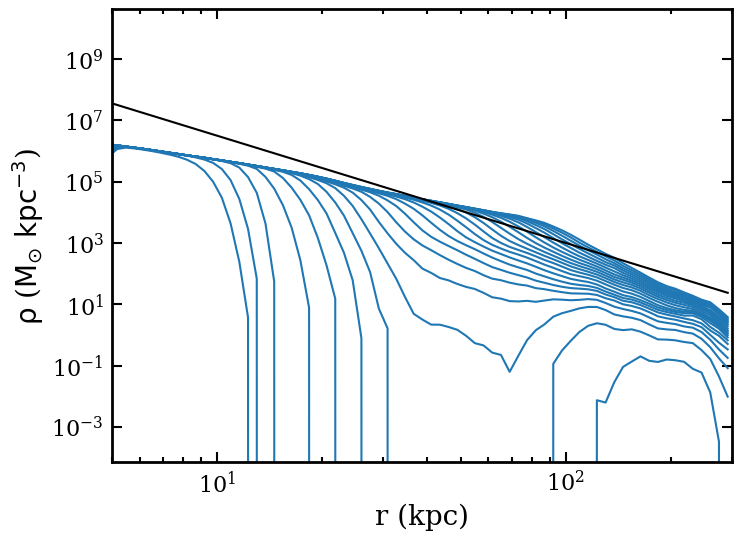

In [21]:
#alright now I'm going to try to apply to data

from scipy.optimize import curve_fit

def power_law(r,alpha,A):
    import numpy as np
    return A*np.power(r,alpha)

f = h5py.File('../m12i_res_7100_cdm/m12i_from_tf_particles.hdf5')

print(f.keys())

h = 0.702

parts = f['PartType1']
print(parts.keys())
      
coords = parts['Coordinates'][:]
vel = parts['Velocities'][:]
mass= parts['Masses'][:]
#stellar_mass = mass[0]*0.17
ids = parts['ParticleIDs'][:]
star_mass = parts['Stellar_Masses'][:]

f_halo = h5py.File('../m12i_res_7100_cdm/halo/halo_600.hdf5')
pos_halo = f_halo['position'][:]/h
mass_halo = f_halo['mass'][:]
radius_halo = f_halo['radius'][:]
vel_halo = f_halo['velocity'][:]

#identify the host                                                                                                    
host_id = np.argmax(mass_halo)
host_mass = mass_halo[host_id]
host_pos = pos_halo[host_id]
host_vel = vel_halo[host_id]

coord_diff = np.subtract(coords,host_pos)
#vel_diff = np.subtract(vel,host_vel)

dist = np.linalg.norm(coord_diff,axis=1)
dist_gal = dist[(dist<300.0)]
star_gal = np.ndarray.flatten(star_mass)[dist<300.0]

threshold_list = np.logspace(-3.0,np.log10(0.4),25)
for threshold in threshold_list:
    print(threshold)
    bins = np.logspace(1.0e-3,np.log10(300.0),100)
    dist_halo = dist_gal[star_gal>threshold]

    density_profile = []

    for kk in range(len(bins)-1):
        particle_mask = (dist_halo>bins[kk])&(dist_halo<bins[kk+1])
        mass_bin = np.sum(particle_mask)*stellar_mass
        bin_size = 4.0/3.0*np.pi*(bins[kk+1]**3.0-bins[kk]**3.0)
        density_profile.append(mass_bin/bin_size)

    bins_plot = np.array([(bins[xx]+bins[xx+1])/2.0 for xx in range(len(bins)-1)])
    density_profile = np.array(density_profile)
    plt.plot(bins_plot,density_profile,color='C0')
    
fit_test = power_law(bins_plot,-3.5,1.0e10)    
plt.plot(bins_plot,fit_test,color='k',linestyle='-',label=r'$\alpha = -3.5$')
plt.yscale('log')
plt.xscale('log')
plt.xlim([5.0,300.0])
#plt.ylim([10.0,5.0e6])
plt.xlabel('r (kpc)',fontsize=20)
plt.ylabel(r'$\rm \rho$ ($\rm M_{\odot}$ $\rm kpc^{-3}$)',fontsize=20)
#plt.legend(frameon=False)
plt.show()

In [18]:
print(stellar_mass)

4959.9004101562505


In [16]:
print(mass)

[5.01154625e+14 5.01154625e+14 5.01154625e+14 ... 5.01154625e+14
 5.01154625e+14 5.01154625e+14]
